In [1]:
## import the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
data = pd.read_csv("datasets/Ads_CTR_Optimisation.csv")

In [5]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
##implement UCB

In [13]:
N = 10000
d = 10

ads_selected = []
number_of_selections = [0]*d
sums_of_rewards = [0]*d

total_reward = 0

avg_reward = 0

for n in range(0,N):
    ad = 0
    max_ucb = 0
    
    for i in range(0,d):
        if number_of_selections[i] > 0:
            avg_reward = sums_of_rewards[i] / number_of_selections[i]
            
            delta_i = math.sqrt( ((3/2)*math.log(n+1)) /number_of_selections[i])
            
            ucb = avg_reward + delta_i
            
        else:
            
            ucb = 1e400
            
        if ucb > max_ucb:
            max_ucb = ucb
            ad = i
            
    ads_selected.append(ad)
    
    number_of_selections[ad] += 1
    
    reward = data.values[n,ad]
    
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    
    total_reward += reward

In [11]:
## visualize the result

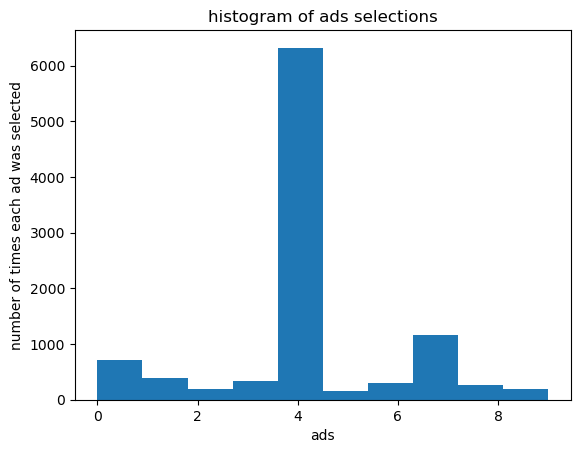

In [14]:
plt.hist(ads_selected)
plt.title("histogram of ads selections")
plt.xlabel("ads")
plt.ylabel("number of times each ad was selected")
plt.show()